In [1]:
# Install dependencies (Kaggle/Colab: run once per session)
!pip install -q segmentation-models-pytorch albumentations

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import segmentation_models_pytorch as smp
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob
from sklearn.model_selection import train_test_split
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA Device: {torch.cuda.get_device_name(0)}")

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.9 MB/s eta 0:00:00
PyTorch version: 2.6.0+cu124
CUDA Available: True
CUDA Device: Tesla P100-PCIE-16GB
Using device: cuda


Starting Brain Stroke Detection Training - PyTorch Version...
Loading dataset...
Found 6650 images; of which 2223 have overlays.
Sample image: /kaggle/input/brain-stroke-ct-dataset/Brain_Stroke_CT_Dataset/Bleeding/PNG/10002.png
Sample mask : /kaggle/input/brain-stroke-ct-dataset/Brain_Stroke_CT_Dataset/Bleeding/OVERLAY/10002.png
Training samples: 5652
Validation samples: 998
Building model...


config.json:   0%|          | 0.00/106 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/77.9M [00:00<?, ?B/s]


Model built successfully!
Total parameters: 20,225,689
Trainable parameters: 20,225,689
Starting training...

Epoch 1/50
------------------------------


Validation: 100%|██████████| 125/125 [00:08<00:00, 14.23it/s, Loss=0.5340, Dice=0.0764, IoU=0.0397]


Train Loss: 0.6214, Train Dice: 0.1032, Train IoU: 0.0637
Val   Loss: 0.5093, Val   Dice: 0.2537, Val   IoU: 0.1571
Val Sensitivity: 0.6131, Val Specificity: 0.9857
Val Accuracy: 0.9845
New best model saved! Dice: 0.2537

Epoch 2/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 17.95it/s, Loss=0.5062, Dice=0.0000, IoU=0.0000]


Train Loss: 0.4204, Train Dice: 0.3978, Train IoU: 0.2766
Val   Loss: 0.3551, Val   Dice: 0.4268, Val   IoU: 0.3110
Val Sensitivity: 0.5054, Val Specificity: 0.9974
Val Accuracy: 0.9955
New best model saved! Dice: 0.4268

Epoch 3/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 18.86it/s, Loss=0.5081, Dice=0.0000, IoU=0.0000]


Train Loss: 0.2764, Train Dice: 0.5273, Train IoU: 0.4010
Val   Loss: 0.2808, Val   Dice: 0.5179, Val   IoU: 0.4164
Val Sensitivity: 0.4668, Val Specificity: 0.9989
Val Accuracy: 0.9970
New best model saved! Dice: 0.5179

Epoch 4/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 18.94it/s, Loss=0.5229, Dice=0.0000, IoU=0.0000]


Train Loss: 0.2281, Train Dice: 0.5849, Train IoU: 0.4598
Val   Loss: 0.2475, Val   Dice: 0.5595, Val   IoU: 0.4404
Val Sensitivity: 0.5701, Val Specificity: 0.9984
Val Accuracy: 0.9968
New best model saved! Dice: 0.5595

Epoch 5/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 18.67it/s, Loss=0.5099, Dice=0.0000, IoU=0.0000]


Train Loss: 0.2130, Train Dice: 0.6103, Train IoU: 0.4883
Val   Loss: 0.2370, Val   Dice: 0.5853, Val   IoU: 0.4788
Val Sensitivity: 0.5346, Val Specificity: 0.9991
Val Accuracy: 0.9974
New best model saved! Dice: 0.5853

Epoch 6/50
------------------------------


Validation: 100%|██████████| 125/125 [00:07<00:00, 17.55it/s, Loss=0.5103, Dice=0.0000, IoU=0.0000]


Train Loss: 0.1862, Train Dice: 0.6622, Train IoU: 0.5380
Val   Loss: 0.2203, Val   Dice: 0.6151, Val   IoU: 0.5034
Val Sensitivity: 0.5942, Val Specificity: 0.9989
Val Accuracy: 0.9975
New best model saved! Dice: 0.6151

Epoch 7/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 19.35it/s, Loss=0.5008, Dice=0.0000, IoU=0.0000]


Train Loss: 0.1891, Train Dice: 0.6544, Train IoU: 0.5351
Val   Loss: 0.2136, Val   Dice: 0.6251, Val   IoU: 0.5181
Val Sensitivity: 0.5884, Val Specificity: 0.9991
Val Accuracy: 0.9977
New best model saved! Dice: 0.6251

Epoch 8/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 19.28it/s, Loss=0.4212, Dice=0.1744, IoU=0.0955]


Train Loss: 0.1867, Train Dice: 0.6628, Train IoU: 0.5415
Val   Loss: 0.2210, Val   Dice: 0.6120, Val   IoU: 0.5064
Val Sensitivity: 0.5493, Val Specificity: 0.9993
Val Accuracy: 0.9976

Epoch 9/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 19.42it/s, Loss=0.5101, Dice=0.0000, IoU=0.0000]


Train Loss: 0.1847, Train Dice: 0.6708, Train IoU: 0.5502
Val   Loss: 0.2358, Val   Dice: 0.5909, Val   IoU: 0.4806
Val Sensitivity: 0.5942, Val Specificity: 0.9986
Val Accuracy: 0.9972

Epoch 10/50
------------------------------


Validation: 100%|██████████| 125/125 [00:07<00:00, 17.15it/s, Loss=0.4562, Dice=0.0968, IoU=0.0509]


Train Loss: 0.1706, Train Dice: 0.6871, Train IoU: 0.5677
Val   Loss: 0.2171, Val   Dice: 0.6264, Val   IoU: 0.5217
Val Sensitivity: 0.5490, Val Specificity: 0.9994
Val Accuracy: 0.9977
New best model saved! Dice: 0.6264

Epoch 11/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 19.36it/s, Loss=0.5098, Dice=0.0000, IoU=0.0000]


Train Loss: 0.1753, Train Dice: 0.6864, Train IoU: 0.5690
Val   Loss: 0.2212, Val   Dice: 0.6176, Val   IoU: 0.5150
Val Sensitivity: 0.5482, Val Specificity: 0.9993
Val Accuracy: 0.9977

Epoch 12/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 19.29it/s, Loss=0.1716, Dice=0.6715, IoU=0.5055]


Train Loss: 0.1683, Train Dice: 0.6978, Train IoU: 0.5798
Val   Loss: 0.2025, Val   Dice: 0.6382, Val   IoU: 0.5300
Val Sensitivity: 0.6040, Val Specificity: 0.9991
Val Accuracy: 0.9977
New best model saved! Dice: 0.6382

Epoch 13/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 18.96it/s, Loss=0.4597, Dice=0.0900, IoU=0.0471]


Train Loss: 0.1640, Train Dice: 0.7142, Train IoU: 0.5965
Val   Loss: 0.2111, Val   Dice: 0.6367, Val   IoU: 0.5340
Val Sensitivity: 0.5923, Val Specificity: 0.9991
Val Accuracy: 0.9977

Epoch 14/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 19.50it/s, Loss=0.2948, Dice=0.4145, IoU=0.2615]


Train Loss: 0.1673, Train Dice: 0.7087, Train IoU: 0.5915
Val   Loss: 0.1963, Val   Dice: 0.6566, Val   IoU: 0.5544
Val Sensitivity: 0.6168, Val Specificity: 0.9992
Val Accuracy: 0.9979
New best model saved! Dice: 0.6566

Epoch 15/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 18.57it/s, Loss=0.1665, Dice=0.6829, IoU=0.5185]


Train Loss: 0.1538, Train Dice: 0.7271, Train IoU: 0.6098
Val   Loss: 0.2008, Val   Dice: 0.6571, Val   IoU: 0.5517
Val Sensitivity: 0.5944, Val Specificity: 0.9992
Val Accuracy: 0.9978
New best model saved! Dice: 0.6571

Epoch 16/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 18.91it/s, Loss=0.1613, Dice=0.6854, IoU=0.5214]


Train Loss: 0.1525, Train Dice: 0.7295, Train IoU: 0.6137
Val   Loss: 0.2140, Val   Dice: 0.6326, Val   IoU: 0.5240
Val Sensitivity: 0.6067, Val Specificity: 0.9989
Val Accuracy: 0.9975

Epoch 17/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 18.31it/s, Loss=0.3121, Dice=0.3819, IoU=0.2360]


Train Loss: 0.1565, Train Dice: 0.7251, Train IoU: 0.6096
Val   Loss: 0.1893, Val   Dice: 0.6797, Val   IoU: 0.5732
Val Sensitivity: 0.6374, Val Specificity: 0.9989
Val Accuracy: 0.9977
New best model saved! Dice: 0.6797

Epoch 18/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 18.84it/s, Loss=0.1605, Dice=0.6789, IoU=0.5138]


Train Loss: 0.1488, Train Dice: 0.7481, Train IoU: 0.6359
Val   Loss: 0.1905, Val   Dice: 0.6756, Val   IoU: 0.5722
Val Sensitivity: 0.6248, Val Specificity: 0.9992
Val Accuracy: 0.9979

Epoch 19/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 18.99it/s, Loss=0.1378, Dice=0.7363, IoU=0.5826]


Train Loss: 0.1523, Train Dice: 0.7357, Train IoU: 0.6220
Val   Loss: 0.2010, Val   Dice: 0.6552, Val   IoU: 0.5557
Val Sensitivity: 0.5842, Val Specificity: 0.9993
Val Accuracy: 0.9979

Epoch 20/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 19.42it/s, Loss=0.0880, Dice=0.8281, IoU=0.7066]


Train Loss: 0.1459, Train Dice: 0.7426, Train IoU: 0.6276
Val   Loss: 0.1920, Val   Dice: 0.6749, Val   IoU: 0.5643
Val Sensitivity: 0.6713, Val Specificity: 0.9986
Val Accuracy: 0.9975

Epoch 21/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 17.98it/s, Loss=0.1539, Dice=0.6970, IoU=0.5349]


Train Loss: 0.1459, Train Dice: 0.7424, Train IoU: 0.6290
Val   Loss: 0.1874, Val   Dice: 0.6822, Val   IoU: 0.5766
Val Sensitivity: 0.6266, Val Specificity: 0.9993
Val Accuracy: 0.9979
New best model saved! Dice: 0.6822

Epoch 22/50
------------------------------


Validation: 100%|██████████| 125/125 [00:07<00:00, 17.70it/s, Loss=0.1527, Dice=0.7076, IoU=0.5475]


Train Loss: 0.1415, Train Dice: 0.7568, Train IoU: 0.6446
Val   Loss: 0.1906, Val   Dice: 0.6760, Val   IoU: 0.5703
Val Sensitivity: 0.6258, Val Specificity: 0.9992
Val Accuracy: 0.9979

Epoch 23/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 19.29it/s, Loss=0.1370, Dice=0.7368, IoU=0.5832]


Train Loss: 0.1393, Train Dice: 0.7676, Train IoU: 0.6549
Val   Loss: 0.1895, Val   Dice: 0.6620, Val   IoU: 0.5510
Val Sensitivity: 0.6520, Val Specificity: 0.9988
Val Accuracy: 0.9977

Epoch 24/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 19.02it/s, Loss=0.1220, Dice=0.7612, IoU=0.6145]


Train Loss: 0.1378, Train Dice: 0.7588, Train IoU: 0.6495
Val   Loss: 0.1965, Val   Dice: 0.6640, Val   IoU: 0.5590
Val Sensitivity: 0.6410, Val Specificity: 0.9990
Val Accuracy: 0.9979

Epoch 25/50
------------------------------


Validation: 100%|██████████| 125/125 [00:07<00:00, 15.90it/s, Loss=0.0805, Dice=0.8497, IoU=0.7387]


Train Loss: 0.1324, Train Dice: 0.7691, Train IoU: 0.6595
Val   Loss: 0.1874, Val   Dice: 0.6762, Val   IoU: 0.5671
Val Sensitivity: 0.6950, Val Specificity: 0.9986
Val Accuracy: 0.9976

Epoch 26/50
------------------------------


Validation: 100%|██████████| 125/125 [00:07<00:00, 17.54it/s, Loss=0.1842, Dice=0.6411, IoU=0.4718]


Train Loss: 0.1402, Train Dice: 0.7668, Train IoU: 0.6574
Val   Loss: 0.1895, Val   Dice: 0.6700, Val   IoU: 0.5669
Val Sensitivity: 0.6169, Val Specificity: 0.9993
Val Accuracy: 0.9980

Epoch 27/50
------------------------------


Validation: 100%|██████████| 125/125 [00:07<00:00, 17.45it/s, Loss=0.1068, Dice=0.7977, IoU=0.6634]


Train Loss: 0.1355, Train Dice: 0.7760, Train IoU: 0.6650
Val   Loss: 0.1861, Val   Dice: 0.6841, Val   IoU: 0.5819
Val Sensitivity: 0.6352, Val Specificity: 0.9992
Val Accuracy: 0.9980
New best model saved! Dice: 0.6841

Epoch 28/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 18.43it/s, Loss=0.1426, Dice=0.7254, IoU=0.5692]


Train Loss: 0.1373, Train Dice: 0.7619, Train IoU: 0.6550
Val   Loss: 0.1809, Val   Dice: 0.6862, Val   IoU: 0.5774
Val Sensitivity: 0.6732, Val Specificity: 0.9990
Val Accuracy: 0.9979
New best model saved! Dice: 0.6862

Epoch 29/50
------------------------------


Validation: 100%|██████████| 125/125 [00:10<00:00, 12.30it/s, Loss=0.0920, Dice=0.8218, IoU=0.6975]


Train Loss: 0.1400, Train Dice: 0.7667, Train IoU: 0.6608
Val   Loss: 0.1835, Val   Dice: 0.6818, Val   IoU: 0.5764
Val Sensitivity: 0.6418, Val Specificity: 0.9992
Val Accuracy: 0.9980

Epoch 30/50
------------------------------


Validation: 100%|██████████| 125/125 [00:11<00:00, 10.95it/s, Loss=0.0904, Dice=0.8203, IoU=0.6953]


Train Loss: 0.1393, Train Dice: 0.7816, Train IoU: 0.6761
Val   Loss: 0.1665, Val   Dice: 0.7148, Val   IoU: 0.6082
Val Sensitivity: 0.6943, Val Specificity: 0.9990
Val Accuracy: 0.9980
New best model saved! Dice: 0.7148

Epoch 31/50
------------------------------


Validation: 100%|██████████| 125/125 [00:07<00:00, 17.51it/s, Loss=0.1455, Dice=0.7176, IoU=0.5596]


Train Loss: 0.1249, Train Dice: 0.7895, Train IoU: 0.6811
Val   Loss: 0.1777, Val   Dice: 0.7014, Val   IoU: 0.5953
Val Sensitivity: 0.6513, Val Specificity: 0.9993
Val Accuracy: 0.9981

Epoch 32/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 18.06it/s, Loss=0.1742, Dice=0.6606, IoU=0.4932]


Train Loss: 0.1323, Train Dice: 0.7783, Train IoU: 0.6735
Val   Loss: 0.1905, Val   Dice: 0.6760, Val   IoU: 0.5734
Val Sensitivity: 0.6105, Val Specificity: 0.9994
Val Accuracy: 0.9980

Epoch 33/50
------------------------------


Validation: 100%|██████████| 125/125 [00:07<00:00, 17.26it/s, Loss=0.0871, Dice=0.8378, IoU=0.7209]


Train Loss: 0.1277, Train Dice: 0.7752, Train IoU: 0.6669
Val   Loss: 0.1810, Val   Dice: 0.6943, Val   IoU: 0.5890
Val Sensitivity: 0.6414, Val Specificity: 0.9992
Val Accuracy: 0.9980

Epoch 34/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 18.95it/s, Loss=0.1189, Dice=0.7639, IoU=0.6180]


Train Loss: 0.1370, Train Dice: 0.7611, Train IoU: 0.6519
Val   Loss: 0.1829, Val   Dice: 0.6918, Val   IoU: 0.5857
Val Sensitivity: 0.6639, Val Specificity: 0.9990
Val Accuracy: 0.9978

Epoch 35/50
------------------------------


Validation: 100%|██████████| 125/125 [00:07<00:00, 17.51it/s, Loss=0.0849, Dice=0.8390, IoU=0.7226]


Train Loss: 0.1333, Train Dice: 0.7722, Train IoU: 0.6671
Val   Loss: 0.1807, Val   Dice: 0.6951, Val   IoU: 0.5901
Val Sensitivity: 0.6393, Val Specificity: 0.9993
Val Accuracy: 0.9980

Epoch 36/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 17.95it/s, Loss=0.0873, Dice=0.8311, IoU=0.7111]


Train Loss: 0.1248, Train Dice: 0.7857, Train IoU: 0.6815
Val   Loss: 0.1753, Val   Dice: 0.6975, Val   IoU: 0.5927
Val Sensitivity: 0.6506, Val Specificity: 0.9992
Val Accuracy: 0.9980

Epoch 37/50
------------------------------


Validation: 100%|██████████| 125/125 [00:07<00:00, 17.19it/s, Loss=0.1091, Dice=0.7885, IoU=0.6509]


Train Loss: 0.1196, Train Dice: 0.7961, Train IoU: 0.6899
Val   Loss: 0.1786, Val   Dice: 0.6920, Val   IoU: 0.5836
Val Sensitivity: 0.6473, Val Specificity: 0.9993
Val Accuracy: 0.9980

Epoch 38/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 19.48it/s, Loss=0.1315, Dice=0.7417, IoU=0.5895]


Train Loss: 0.1283, Train Dice: 0.7767, Train IoU: 0.6697
Val   Loss: 0.1797, Val   Dice: 0.6970, Val   IoU: 0.5938
Val Sensitivity: 0.6410, Val Specificity: 0.9993
Val Accuracy: 0.9981

Epoch 39/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 18.02it/s, Loss=0.1256, Dice=0.7564, IoU=0.6082]


Train Loss: 0.1258, Train Dice: 0.7849, Train IoU: 0.6800
Val   Loss: 0.1897, Val   Dice: 0.6772, Val   IoU: 0.5740
Val Sensitivity: 0.6589, Val Specificity: 0.9990
Val Accuracy: 0.9979

Epoch 40/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 19.27it/s, Loss=0.0782, Dice=0.8480, IoU=0.7361]


Train Loss: 0.1139, Train Dice: 0.8152, Train IoU: 0.7126
Val   Loss: 0.1726, Val   Dice: 0.7111, Val   IoU: 0.6110
Val Sensitivity: 0.6779, Val Specificity: 0.9992
Val Accuracy: 0.9981

Epoch 41/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 18.46it/s, Loss=0.0720, Dice=0.8602, IoU=0.7548]


Train Loss: 0.1096, Train Dice: 0.8150, Train IoU: 0.7140
Val   Loss: 0.1708, Val   Dice: 0.7133, Val   IoU: 0.6117
Val Sensitivity: 0.6857, Val Specificity: 0.9991
Val Accuracy: 0.9981

Epoch 42/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 19.23it/s, Loss=0.0741, Dice=0.8577, IoU=0.7509]


Train Loss: 0.1098, Train Dice: 0.8287, Train IoU: 0.7284
Val   Loss: 0.1713, Val   Dice: 0.7134, Val   IoU: 0.6114
Val Sensitivity: 0.6644, Val Specificity: 0.9993
Val Accuracy: 0.9981

Epoch 43/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 18.07it/s, Loss=0.1735, Dice=0.6629, IoU=0.4958]


Train Loss: 0.1200, Train Dice: 0.8209, Train IoU: 0.7224
Val   Loss: 0.1900, Val   Dice: 0.6770, Val   IoU: 0.5754
Val Sensitivity: 0.5962, Val Specificity: 0.9995
Val Accuracy: 0.9981

Epoch 44/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 19.32it/s, Loss=0.0730, Dice=0.8637, IoU=0.7601]


Train Loss: 0.1130, Train Dice: 0.8124, Train IoU: 0.7116
Val   Loss: 0.1667, Val   Dice: 0.7222, Val   IoU: 0.6167
Val Sensitivity: 0.6644, Val Specificity: 0.9992
Val Accuracy: 0.9981
New best model saved! Dice: 0.7222

Epoch 45/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 19.42it/s, Loss=0.1101, Dice=0.7896, IoU=0.6523]


Train Loss: 0.1098, Train Dice: 0.8239, Train IoU: 0.7258
Val   Loss: 0.1683, Val   Dice: 0.7193, Val   IoU: 0.6158
Val Sensitivity: 0.6550, Val Specificity: 0.9994
Val Accuracy: 0.9982

Epoch 46/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 18.79it/s, Loss=0.1001, Dice=0.8026, IoU=0.6703]


Train Loss: 0.1100, Train Dice: 0.8261, Train IoU: 0.7302
Val   Loss: 0.1681, Val   Dice: 0.7190, Val   IoU: 0.6164
Val Sensitivity: 0.6608, Val Specificity: 0.9994
Val Accuracy: 0.9982

Epoch 47/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 17.96it/s, Loss=0.0920, Dice=0.8224, IoU=0.6984]


Train Loss: 0.1076, Train Dice: 0.8281, Train IoU: 0.7307
Val   Loss: 0.1677, Val   Dice: 0.7207, Val   IoU: 0.6202
Val Sensitivity: 0.6715, Val Specificity: 0.9993
Val Accuracy: 0.9982

Epoch 48/50
------------------------------


Validation: 100%|██████████| 125/125 [00:07<00:00, 16.43it/s, Loss=0.0835, Dice=0.8395, IoU=0.7234]


Train Loss: 0.1052, Train Dice: 0.8270, Train IoU: 0.7283
Val   Loss: 0.1633, Val   Dice: 0.7291, Val   IoU: 0.6261
Val Sensitivity: 0.6954, Val Specificity: 0.9992
Val Accuracy: 0.9982
New best model saved! Dice: 0.7291

Epoch 49/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 18.76it/s, Loss=0.0992, Dice=0.8112, IoU=0.6823]


Train Loss: 0.1086, Train Dice: 0.8219, Train IoU: 0.7239
Val   Loss: 0.1645, Val   Dice: 0.7259, Val   IoU: 0.6228
Val Sensitivity: 0.6589, Val Specificity: 0.9994
Val Accuracy: 0.9982

Epoch 50/50
------------------------------


Validation: 100%|██████████| 125/125 [00:06<00:00, 19.00it/s, Loss=0.0739, Dice=0.8590, IoU=0.7529]


Train Loss: 0.1058, Train Dice: 0.8341, Train IoU: 0.7384
Val   Loss: 0.1678, Val   Dice: 0.7199, Val   IoU: 0.6167
Val Sensitivity: 0.6656, Val Specificity: 0.9993
Val Accuracy: 0.9982


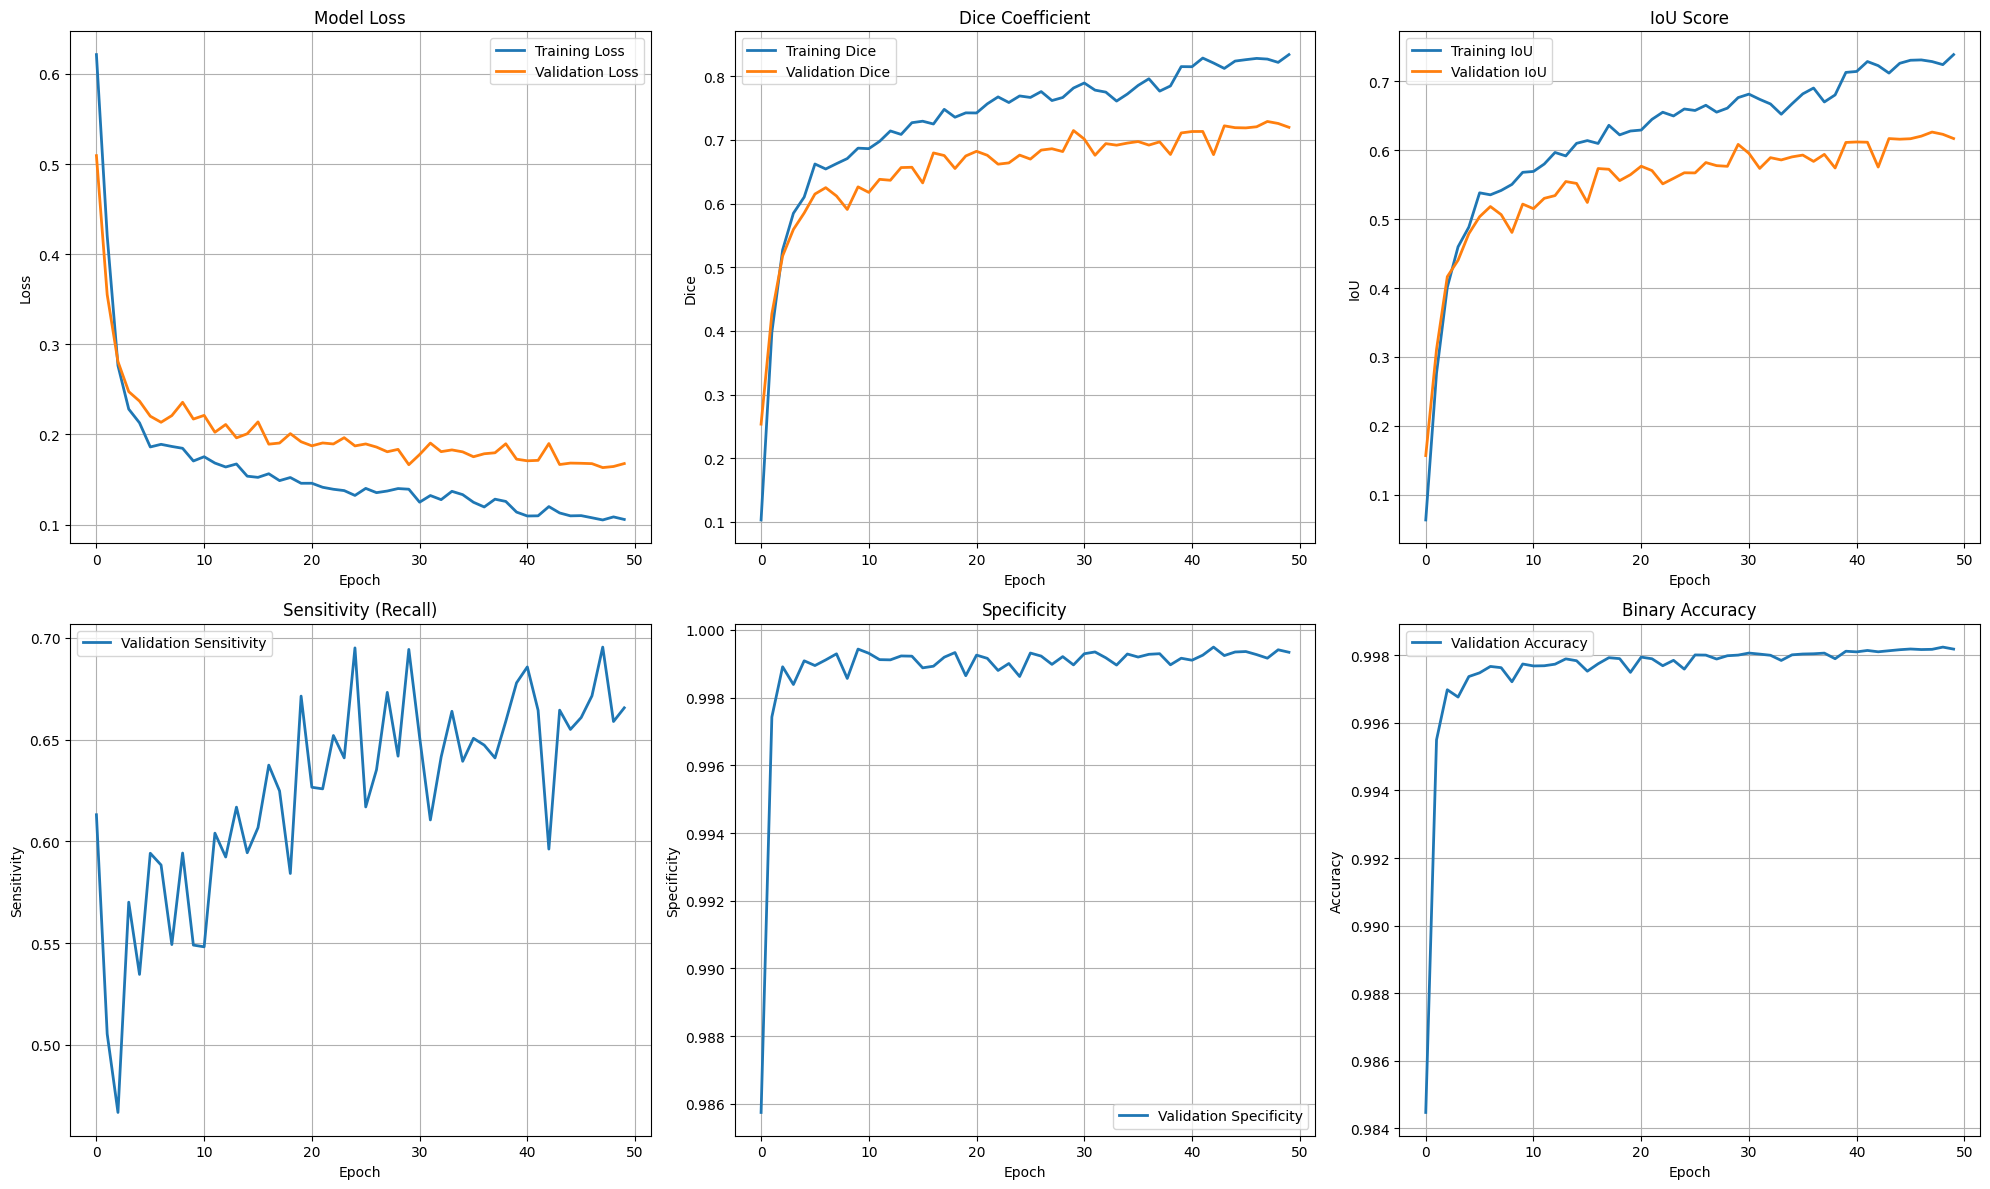

Found 6650 images; of which 2223 have overlays.
Sample image: /kaggle/input/brain-stroke-ct-dataset/Brain_Stroke_CT_Dataset/Bleeding/PNG/10002.png
Sample mask : /kaggle/input/brain-stroke-ct-dataset/Brain_Stroke_CT_Dataset/Bleeding/OVERLAY/10002.png

Visualizing predictions...


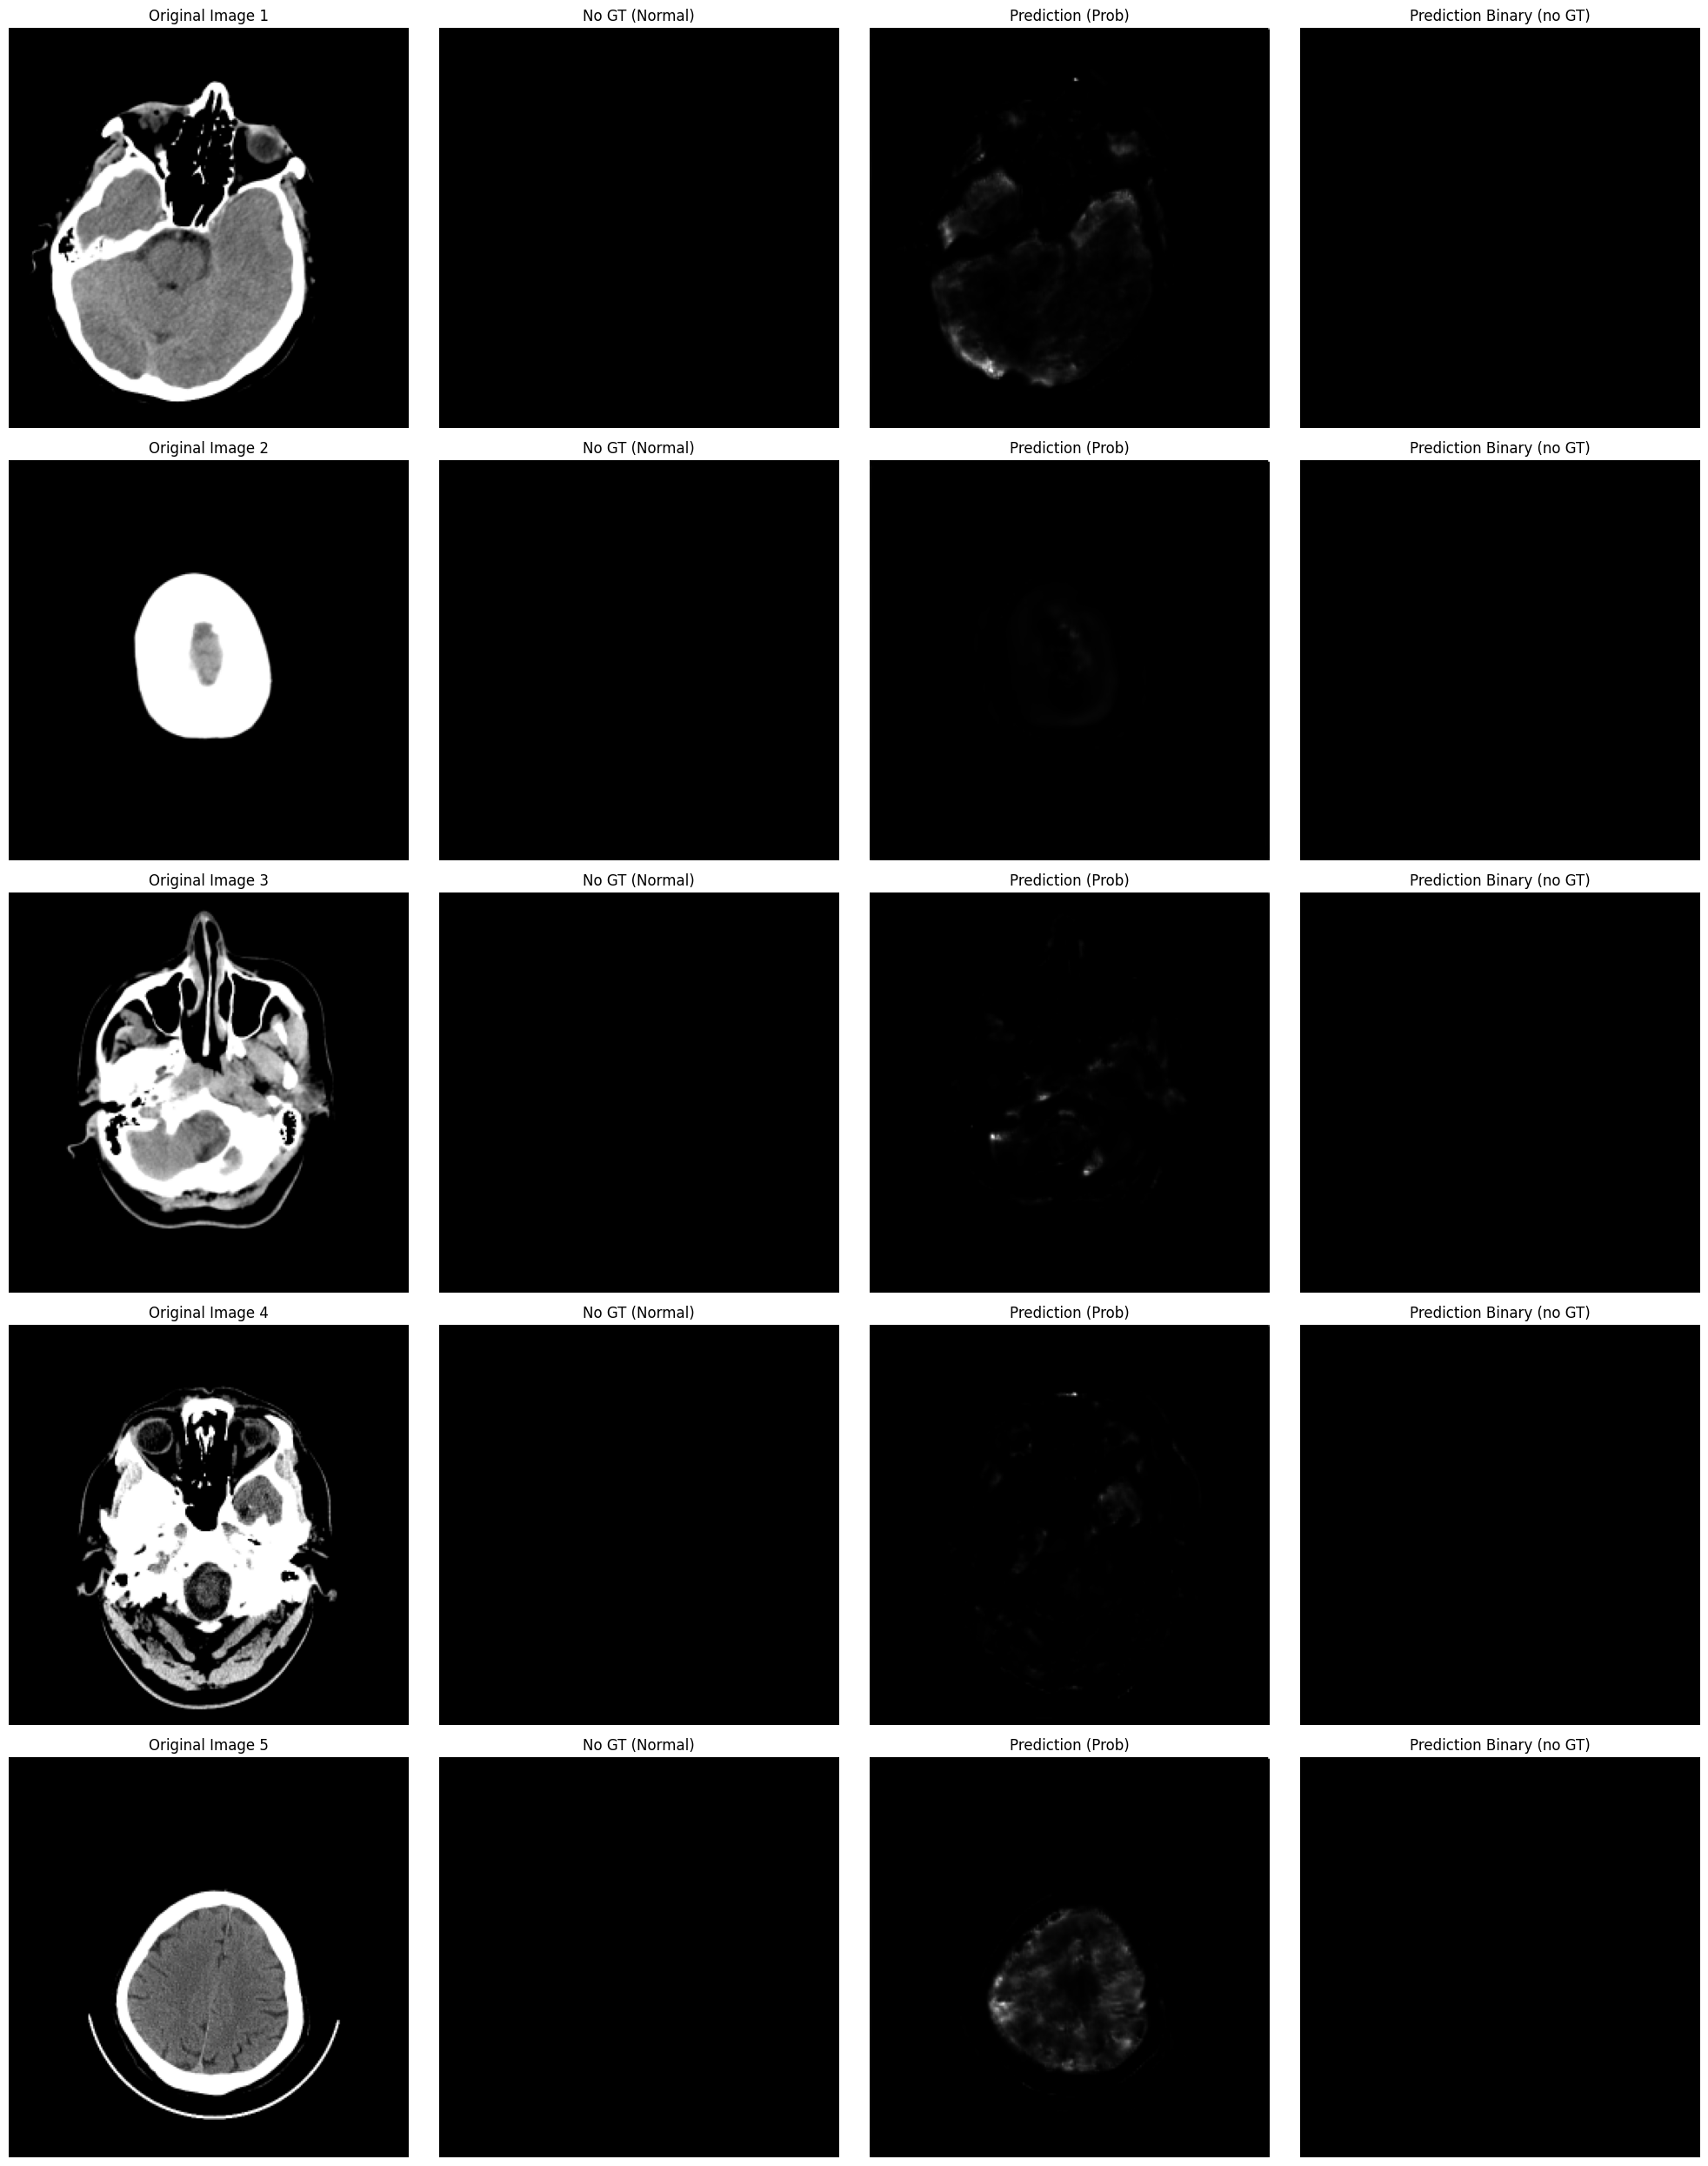

Evaluating model on test set...
Evaluating 0/100

Evaluation Results (lesion slices only):
No GT masks found for evaluation.

Training completed successfully!
Model saved as 'best_stroke_model_with_normals.pth'


In [2]:
# =====================
# Configuration
# =====================
class Config:
    BATCH_SIZE = 8  # Adjust for memory
    IMG_HEIGHT = 256
    IMG_WIDTH = 256
    EPOCHS = 50
    LEARNING_RATE = 1e-4
    DATASET_PATH = '/kaggle/input/brain-stroke-ct-dataset/Brain_Stroke_CT_Dataset'  # <- ensure correct root
    DEVICE = device
    NUM_WORKERS = 2  # Set to 0 on Kaggle if hitting RAM issues

config = Config()

# =====================
# Utility: Extract red mask from OVERLAY path
# =====================
def extract_red_mask_from_path(mask_path, width, height):
    """Read a color overlay image and extract the red-filled lesion as a binary mask {0,1}       Returns None if path missing/unreadable.
    """
    if mask_path is None or (isinstance(mask_path, str) and not os.path.exists(mask_path)):
        return None
    if not isinstance(mask_path, str):
        return None
    overlay = cv2.imread(mask_path)  # BGR
    if overlay is None:
        return None
    hsv = cv2.cvtColor(overlay, cv2.COLOR_BGR2HSV)
    lower1, upper1 = np.array([0, 50, 50]),  np.array([10, 255, 255])
    lower2, upper2 = np.array([170, 50, 50]), np.array([180, 255, 255])
    mask = cv2.inRange(hsv, lower1, upper1) | cv2.inRange(hsv, lower2, upper2)
    mask = (mask > 0).astype(np.float32)
    mask = cv2.resize(mask, (width, height), interpolation=cv2.INTER_NEAREST)
    mask = (mask > 0.5).astype(np.float32)
    return mask

# =====================
# Dataset
# =====================
class StrokeDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transforms=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths  # may contain None for "Normal" images
        self.transforms = transforms

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # --- image ---
        img = cv2.imread(self.image_paths[idx])
        if img is None:
            img = np.zeros((config.IMG_HEIGHT, config.IMG_WIDTH, 3), dtype=np.uint8)
        else:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (config.IMG_WIDTH, config.IMG_HEIGHT), interpolation=cv2.INTER_LINEAR)

        # --- overlay -> binary mask (0/1); for Normal (no OVERLAY) use all-zeros ---
        mask_path = self.mask_paths[idx]
        msk = extract_red_mask_from_path(mask_path, config.IMG_WIDTH, config.IMG_HEIGHT)
        if msk is None:
            msk = np.zeros((config.IMG_HEIGHT, config.IMG_WIDTH), dtype=np.float32)

        if self.transforms:
            transformed = self.transforms(image=img, mask=msk)
            img, msk = transformed['image'], transformed['mask']

        return img, msk

# =====================
# Transforms
# =====================
def get_transforms(is_training=True):
    if is_training:
        return A.Compose([
            A.HorizontalFlip(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.05, contrast_limit=0.05, p=0.3),
            A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=5, p=0.3),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2(),
        ])
    else:
        return A.Compose([
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2(),
        ])

# =====================
# Data discovery (includes Normal with empty masks)
# =====================

def load_and_preprocess_data():
    """Scan dataset folders and pair PNG with OVERLAY having the same filename.
       If a PNG has no matching OVERLAY (e.g., in Normal), include it with an empty mask.
    """
    images_paths, masks_paths = [], []

    # Expect subfolders: Bleeding/, Ischemia/, Normal/, maybe External_Test/
    for class_dir in ["Bleeding", "Ischemia", "Normal"]:
        png_dir = os.path.join(config.DATASET_PATH, class_dir, "PNG")
        overlay_dir = os.path.join(config.DATASET_PATH, class_dir, "OVERLAY")
        if not os.path.exists(png_dir):
            continue
        png_files = sorted(glob(os.path.join(png_dir, "*.png")))

        for png_file in png_files:
            filename = os.path.basename(png_file)
            overlay_file = os.path.join(overlay_dir, filename)
            if os.path.exists(overlay_dir) and os.path.exists(overlay_file):
                images_paths.append(png_file)
                masks_paths.append(overlay_file)
            else:
                # No overlay -> treat as Normal/negative (all-zero mask)
                images_paths.append(png_file)
                masks_paths.append(None)

    print(f"Found {len(images_paths)} images; of which {sum(1 for m in masks_paths if m is not None)} have overlays.")
    if len(images_paths) > 0:
        print(f"Sample image: {images_paths[0]}")
        print(f"Sample mask : {masks_paths[0]}")
    return images_paths, masks_paths

# =====================
# Model
# =====================

def build_model():
    # Use logits (activation=None) + BCEWithLogitsLoss for numerical stability
    model = smp.Unet(
        encoder_name='efficientnet-b4',
        encoder_weights='imagenet',
        in_channels=3,
        classes=1,
        activation=None,
    )
    return model

# =====================
# Losses & Metrics
# =====================
class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-6):
        super().__init__()
        self.smooth = smooth
    def forward(self, y_pred_prob, y_true):
        y_pred = y_pred_prob.view(-1)
        y_true = y_true.view(-1)
        intersection = (y_pred * y_true).sum()
        dice = (2. * intersection + self.smooth) / (y_pred.sum() + y_true.sum() + self.smooth)
        return 1 - dice

class CombinedLoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.bce = nn.BCEWithLogitsLoss()
        self.dice = DiceLoss()
    def forward(self, y_pred_logits, y_true):
        prob = torch.sigmoid(y_pred_logits)
        return 0.5 * self.bce(y_pred_logits, y_true) + 0.5 * self.dice(prob, y_true)

def calculate_dice_score(y_pred_prob, y_true, smooth=1e-6):
    y_pred = (y_pred_prob > 0.5).float()
    intersection = (y_pred * y_true).sum()
    dice = (2. * intersection + smooth) / (y_pred.sum() + y_true.sum() + smooth)
    return dice.item()

def calculate_iou_score(y_pred_prob, y_true, smooth=1e-6):
    y_pred = (y_pred_prob > 0.5).float()
    intersection = (y_pred * y_true).sum()
    union = y_pred.sum() + y_true.sum() - intersection
    iou = (intersection + smooth) / (union + smooth)
    return iou.item()

def calculate_sensitivity(y_pred_prob, y_true):
    y_pred = (y_pred_prob > 0.5).float()
    true_positives = (y_pred * y_true).sum()
    actual_positives = y_true.sum()
    if actual_positives == 0:
        return 0.0
    return (true_positives / actual_positives).item()

def calculate_specificity(y_pred_prob, y_true):
    y_pred = (y_pred_prob > 0.5).float()
    true_negatives = ((1 - y_pred) * (1 - y_true)).sum()
    actual_negatives = (1 - y_true).sum()
    if actual_negatives == 0:
        return 0.0
    return (true_negatives / actual_negatives).item()

# =====================
# Train / Validate loops
# =====================

def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = running_dice = running_iou = 0.0
    progress_bar = tqdm(dataloader, desc='Training')
    for batch_idx, (images, masks) in enumerate(progress_bar):
        images = images.to(device)
        masks = masks.unsqueeze(1).to(device)

        logits = model(images)
        loss = criterion(logits, masks)

        optimizer.zero_grad(); loss.backward(); optimizer.step()

        probs = torch.sigmoid(logits)
        dice_score = calculate_dice_score(probs, masks)
        iou_score = calculate_iou_score(probs, masks)

        running_loss += loss.item()
        running_dice += dice_score
        running_iou += iou_score

        progress_bar.set_postfix({'Loss': f'{loss.item():.4f}', 'Dice': f'{dice_score:.4f}', 'IoU': f'{iou_score:.4f}'})

    N = len(dataloader)
    return running_loss / N, running_dice / N, running_iou / N


def validate_epoch(model, dataloader, criterion, device):
    model.eval()
    running_loss = running_dice = running_iou = 0.0
    running_sensitivity = running_specificity = running_accuracy = 0.0
    progress_bar = tqdm(dataloader, desc='Validation')
    with torch.no_grad():
        for images, masks in progress_bar:
            images = images.to(device)
            masks = masks.unsqueeze(1).to(device)

            logits = model(images)
            loss = criterion(logits, masks)

            probs = torch.sigmoid(logits)
            dice_score = calculate_dice_score(probs, masks)
            iou_score = calculate_iou_score(probs, masks)
            sensitivity = calculate_sensitivity(probs, masks)
            specificity = calculate_specificity(probs, masks)

            pred_binary = (probs > 0.5).float()
            accuracy = (pred_binary == masks).float().mean().item()

            running_loss += loss.item()
            running_dice += dice_score
            running_iou += iou_score
            running_sensitivity += sensitivity
            running_specificity += specificity
            running_accuracy += accuracy

            progress_bar.set_postfix({'Loss': f'{loss.item():.4f}', 'Dice': f'{dice_score:.4f}', 'IoU': f'{iou_score:.4f}'})

    N = len(dataloader)
    return (
        running_loss / N,
        running_dice / N,
        running_iou / N,
        running_sensitivity / N,
        running_specificity / N,
        running_accuracy / N,
    )

# =====================
# Training wrapper
# =====================

def train_model():
    print("Loading dataset...")
    image_paths, mask_paths = load_and_preprocess_data()
    if len(image_paths) == 0:
        print("No images found! Please check the dataset path.")
        return None, None

    train_images, val_images, train_masks, val_masks = train_test_split(
        image_paths, mask_paths, test_size=0.15, random_state=42
    )

    print(f"Training samples: {len(train_images)}")
    print(f"Validation samples: {len(val_images)}")

    train_dataset = StrokeDataset(train_images, train_masks, get_transforms(True))
    val_dataset   = StrokeDataset(val_images,   val_masks,   get_transforms(False))

    train_dataloader = DataLoader(train_dataset, batch_size=config.BATCH_SIZE, shuffle=True,
                                  num_workers=config.NUM_WORKERS, pin_memory=True)
    val_dataloader   = DataLoader(val_dataset,   batch_size=config.BATCH_SIZE, shuffle=False,
                                  num_workers=config.NUM_WORKERS, pin_memory=True)

    print("Building model...")
    model = build_model().to(device)
    print("\nModel built successfully!")
    print(f"Total parameters: {sum(p.numel() for p in model.parameters()):,}")
    print(f"Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

    criterion = CombinedLoss()
    optimizer = optim.Adam(model.parameters(), lr=config.LEARNING_RATE)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=8,
                                                     min_lr=1e-7, verbose=True)

    history = {
        'train_loss': [], 'val_loss': [],
        'train_dice': [], 'val_dice': [],
        'train_iou':  [], 'val_iou':  [],
        'val_sensitivity': [], 'val_specificity': [], 'val_accuracy': []
    }

    best_dice = 0.0
    patience_counter = 0
    patience = 15

    print("Starting training...")
    print("="*50)

    for epoch in range(config.EPOCHS):
        print(f"\nEpoch {epoch+1}/{config.EPOCHS}")
        print("-" * 30)

        train_loss, train_dice, train_iou = train_epoch(model, train_dataloader, criterion, optimizer, device)
        val_loss, val_dice, val_iou, val_sensitivity, val_specificity, val_accuracy = validate_epoch(
            model, val_dataloader, criterion, device
        )

        scheduler.step(val_dice)

        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_dice'].append(train_dice)
        history['val_dice'].append(val_dice)
        history['train_iou'].append(train_iou)
        history['val_iou'].append(val_iou)
        history['val_sensitivity'].append(val_sensitivity)
        history['val_specificity'].append(val_specificity)
        history['val_accuracy'].append(val_accuracy)

        print(f"Train Loss: {train_loss:.4f}, Train Dice: {train_dice:.4f}, Train IoU: {train_iou:.4f}")
        print(f"Val   Loss: {val_loss:.4f}, Val   Dice: {val_dice:.4f}, Val   IoU: {val_iou:.4f}")
        print(f"Val Sensitivity: {val_sensitivity:.4f}, Val Specificity: {val_specificity:.4f}")
        print(f"Val Accuracy: {val_accuracy:.4f}")

        if val_dice > best_dice:
            best_dice = val_dice
            torch.save(model.state_dict(), 'best_stroke_model_with_normals.pth')
            print(f"New best model saved! Dice: {best_dice:.4f}")
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs")
            break

    model.load_state_dict(torch.load('best_stroke_model_with_normals.pth'))
    return model, history

# =====================
# Plots
# =====================

def plot_training_history(history):
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes[0, 0].plot(history['train_loss'], label='Training Loss', linewidth=2)
    axes[0, 0].plot(history['val_loss'], label='Validation Loss', linewidth=2)
    axes[0, 0].set_title('Model Loss'); axes[0, 0].set_xlabel('Epoch'); axes[0, 0].set_ylabel('Loss'); axes[0, 0].legend(); axes[0, 0].grid(True)

    axes[0, 1].plot(history['train_dice'], label='Training Dice', linewidth=2)
    axes[0, 1].plot(history['val_dice'], label='Validation Dice', linewidth=2)
    axes[0, 1].set_title('Dice Coefficient'); axes[0, 1].set_xlabel('Epoch'); axes[0, 1].set_ylabel('Dice'); axes[0, 1].legend(); axes[0, 1].grid(True)

    axes[0, 2].plot(history['train_iou'], label='Training IoU', linewidth=2)
    axes[0, 2].plot(history['val_iou'], label='Validation IoU', linewidth=2)
    axes[0, 2].set_title('IoU Score'); axes[0, 2].set_xlabel('Epoch'); axes[0, 2].set_ylabel('IoU'); axes[0, 2].legend(); axes[0, 2].grid(True)

    axes[1, 0].plot(history['val_sensitivity'], label='Validation Sensitivity', linewidth=2)
    axes[1, 0].set_title('Sensitivity (Recall)'); axes[1, 0].set_xlabel('Epoch'); axes[1, 0].set_ylabel('Sensitivity'); axes[1, 0].legend(); axes[1, 0].grid(True)

    axes[1, 1].plot(history['val_specificity'], label='Validation Specificity', linewidth=2)
    axes[1, 1].set_title('Specificity'); axes[1, 1].set_xlabel('Epoch'); axes[1, 1].set_ylabel('Specificity'); axes[1, 1].legend(); axes[1, 1].grid(True)

    axes[1, 2].plot(history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[1, 2].set_title('Binary Accuracy'); axes[1, 2].set_xlabel('Epoch'); axes[1, 2].set_ylabel('Accuracy'); axes[1, 2].legend(); axes[1, 2].grid(True)

    plt.tight_layout(); plt.show()

# =====================
# Visualization & Evaluation (same mask logic; skip metrics if no GT)
# =====================

def predict_and_visualize(model, image_paths, mask_paths, num_samples=5):
    model.eval()
    transforms = get_transforms(False)
    rows = min(num_samples, len(image_paths))
    fig, axes = plt.subplots(rows, 4, figsize=(20, 5*rows))

    with torch.no_grad():
        for i in range(rows):
            image = cv2.imread(image_paths[i])
            if image is None:
                print(f"Could not load image: {image_paths[i]}")
                continue
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image_resized = cv2.resize(image_rgb, (config.IMG_WIDTH, config.IMG_HEIGHT))

            mask_binary = extract_red_mask_from_path(mask_paths[i], config.IMG_WIDTH, config.IMG_HEIGHT)
            has_gt = mask_binary is not None
            if not has_gt:
                mask_binary = np.zeros((config.IMG_HEIGHT, config.IMG_WIDTH), dtype=np.float32)

            transformed = transforms(image=image_resized, mask=mask_binary)
            image_tensor = transformed['image'].unsqueeze(0).to(device)

            pred_logits = model(image_tensor)[0, 0].cpu().numpy()
            pred_prob = 1 / (1 + np.exp(-pred_logits))
            pred_mask_binary = (pred_prob > 0.5).astype(np.uint8) * 255

            if has_gt:
                pred_binary = (pred_prob > 0.5).astype(np.float32)
                intersection = np.sum(mask_binary * pred_binary)
                union = np.sum(mask_binary) + np.sum(pred_binary) - intersection
                iou = intersection / (union + 1e-6) if union > 0 else 0
                dice = (2 * intersection) / (np.sum(mask_binary) + np.sum(pred_binary) + 1e-6)
                title3 = f'Prediction Binary\nDice: {dice:.3f}, IoU: {iou:.3f}'
            else:
                title3 = 'Prediction Binary (no GT)'

            axes[i, 0].imshow(image_resized); axes[i, 0].set_title(f'Original Image {i+1}'); axes[i, 0].axis('off')
            axes[i, 1].imshow(mask_binary, cmap='gray'); axes[i, 1].set_title('Ground Truth Mask' if has_gt else 'No GT (Normal)'); axes[i, 1].axis('off')
            axes[i, 2].imshow(pred_prob, cmap='gray'); axes[i, 2].set_title('Prediction (Prob)'); axes[i, 2].axis('off')
            axes[i, 3].imshow(pred_mask_binary, cmap='gray'); axes[i, 3].set_title(title3); axes[i, 3].axis('off')

    plt.tight_layout(); plt.show()


def evaluate_model(model, image_paths, mask_paths):
    print("Evaluating model on test set...")
    model.eval()
    transforms = get_transforms(False)
    dice_scores, iou_scores = [], []

    with torch.no_grad():
        for i, (img_path, mask_path) in enumerate(zip(image_paths, mask_paths)):
            if i % 100 == 0:
                print(f"Evaluating {i}/{len(image_paths)}")

            image = cv2.imread(img_path)
            if image is None:
                continue
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image_resized = cv2.resize(image_rgb, (config.IMG_WIDTH, config.IMG_HEIGHT))

            mask_binary = extract_red_mask_from_path(mask_path, config.IMG_WIDTH, config.IMG_HEIGHT)
            if mask_binary is None:
                # skip normals for quantitative metrics
                continue

            x = get_transforms(False)(image=image_resized, mask=mask_binary)['image'].unsqueeze(0).to(device)
            pred_logits = model(x)[0, 0].cpu().numpy()
            pred_prob = 1 / (1 + np.exp(-pred_logits))
            pred_binary = (pred_prob > 0.5).astype(np.float32)

            intersection = np.sum(mask_binary * pred_binary)
            union = np.sum(mask_binary) + np.sum(pred_binary) - intersection
            if union > 0:
                iou = intersection / union
                dice = (2 * intersection) / (np.sum(mask_binary) + np.sum(pred_binary))
                dice_scores.append(dice)
                iou_scores.append(iou)

    print("\nEvaluation Results (lesion slices only):")
    if len(dice_scores) == 0:
        print("No GT masks found for evaluation.")
    else:
        print(f"Mean Dice Score: {np.mean(dice_scores):.4f} ± {np.std(dice_scores):.4f}")
        print(f"Mean IoU  Score: {np.mean(iou_scores):.4f} ± {np.std(iou_scores):.4f}")
        print(f"Median Dice Score: {np.median(dice_scores):.4f}")
        print(f"Median IoU  Score: {np.median(iou_scores):.4f}")
    return dice_scores, iou_scores

# =====================
# Inference for a single image (no GT required)
# =====================

def predict_single_image(model, image_path, threshold=0.5, device=config.DEVICE):
    model.eval()
    transforms = get_transforms(False)

    bgr = cv2.imread(image_path)
    if bgr is None:
        raise FileNotFoundError(f"Could not read image: {image_path}")
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    rgb = cv2.resize(rgb, (config.IMG_WIDTH, config.IMG_HEIGHT), interpolation=cv2.INTER_LINEAR)

    sample = transforms(image=rgb, mask=np.zeros((config.IMG_HEIGHT, config.IMG_WIDTH), np.float32))
    x = sample['image'].unsqueeze(0).to(device)

    with torch.no_grad():
        logits = model(x)[0, 0].cpu().numpy()
    prob = 1 / (1 + np.exp(-logits))
    pred_bin = (prob > threshold).astype(np.uint8) * 255

    overlay = rgb.copy()
    overlay[pred_bin > 0] = (255, 64, 64)
    return rgb, prob, pred_bin, overlay

# =====================
# Main
# =====================
if __name__ == "__main__":
    print("Starting Brain Stroke Detection Training - PyTorch Version...")
    print("="*60)

    model, history = train_model()

    if model is not None and history is not None:
        plot_training_history(history)
        image_paths, mask_paths = load_and_preprocess_data()

        print("\nVisualizing predictions...")
        predict_and_visualize(model, image_paths[-10:], mask_paths[-10:], num_samples=5)

        dice_scores, iou_scores = evaluate_model(model, image_paths[-100:], mask_paths[-100:])

        print("\nTraining completed successfully!")
        print("Model saved as 'best_stroke_model_with_normals.pth'")
    else:
        print("Training failed. Please check the dataset path and try again.")


Model loaded.
External_Test images: 200  (with GT: 200)

=== External_Test results ===
Lesion-slices: N=75
Mean Dice: 0.6214 ± 0.3867
Mean IoU : 0.5517 ± 0.3631


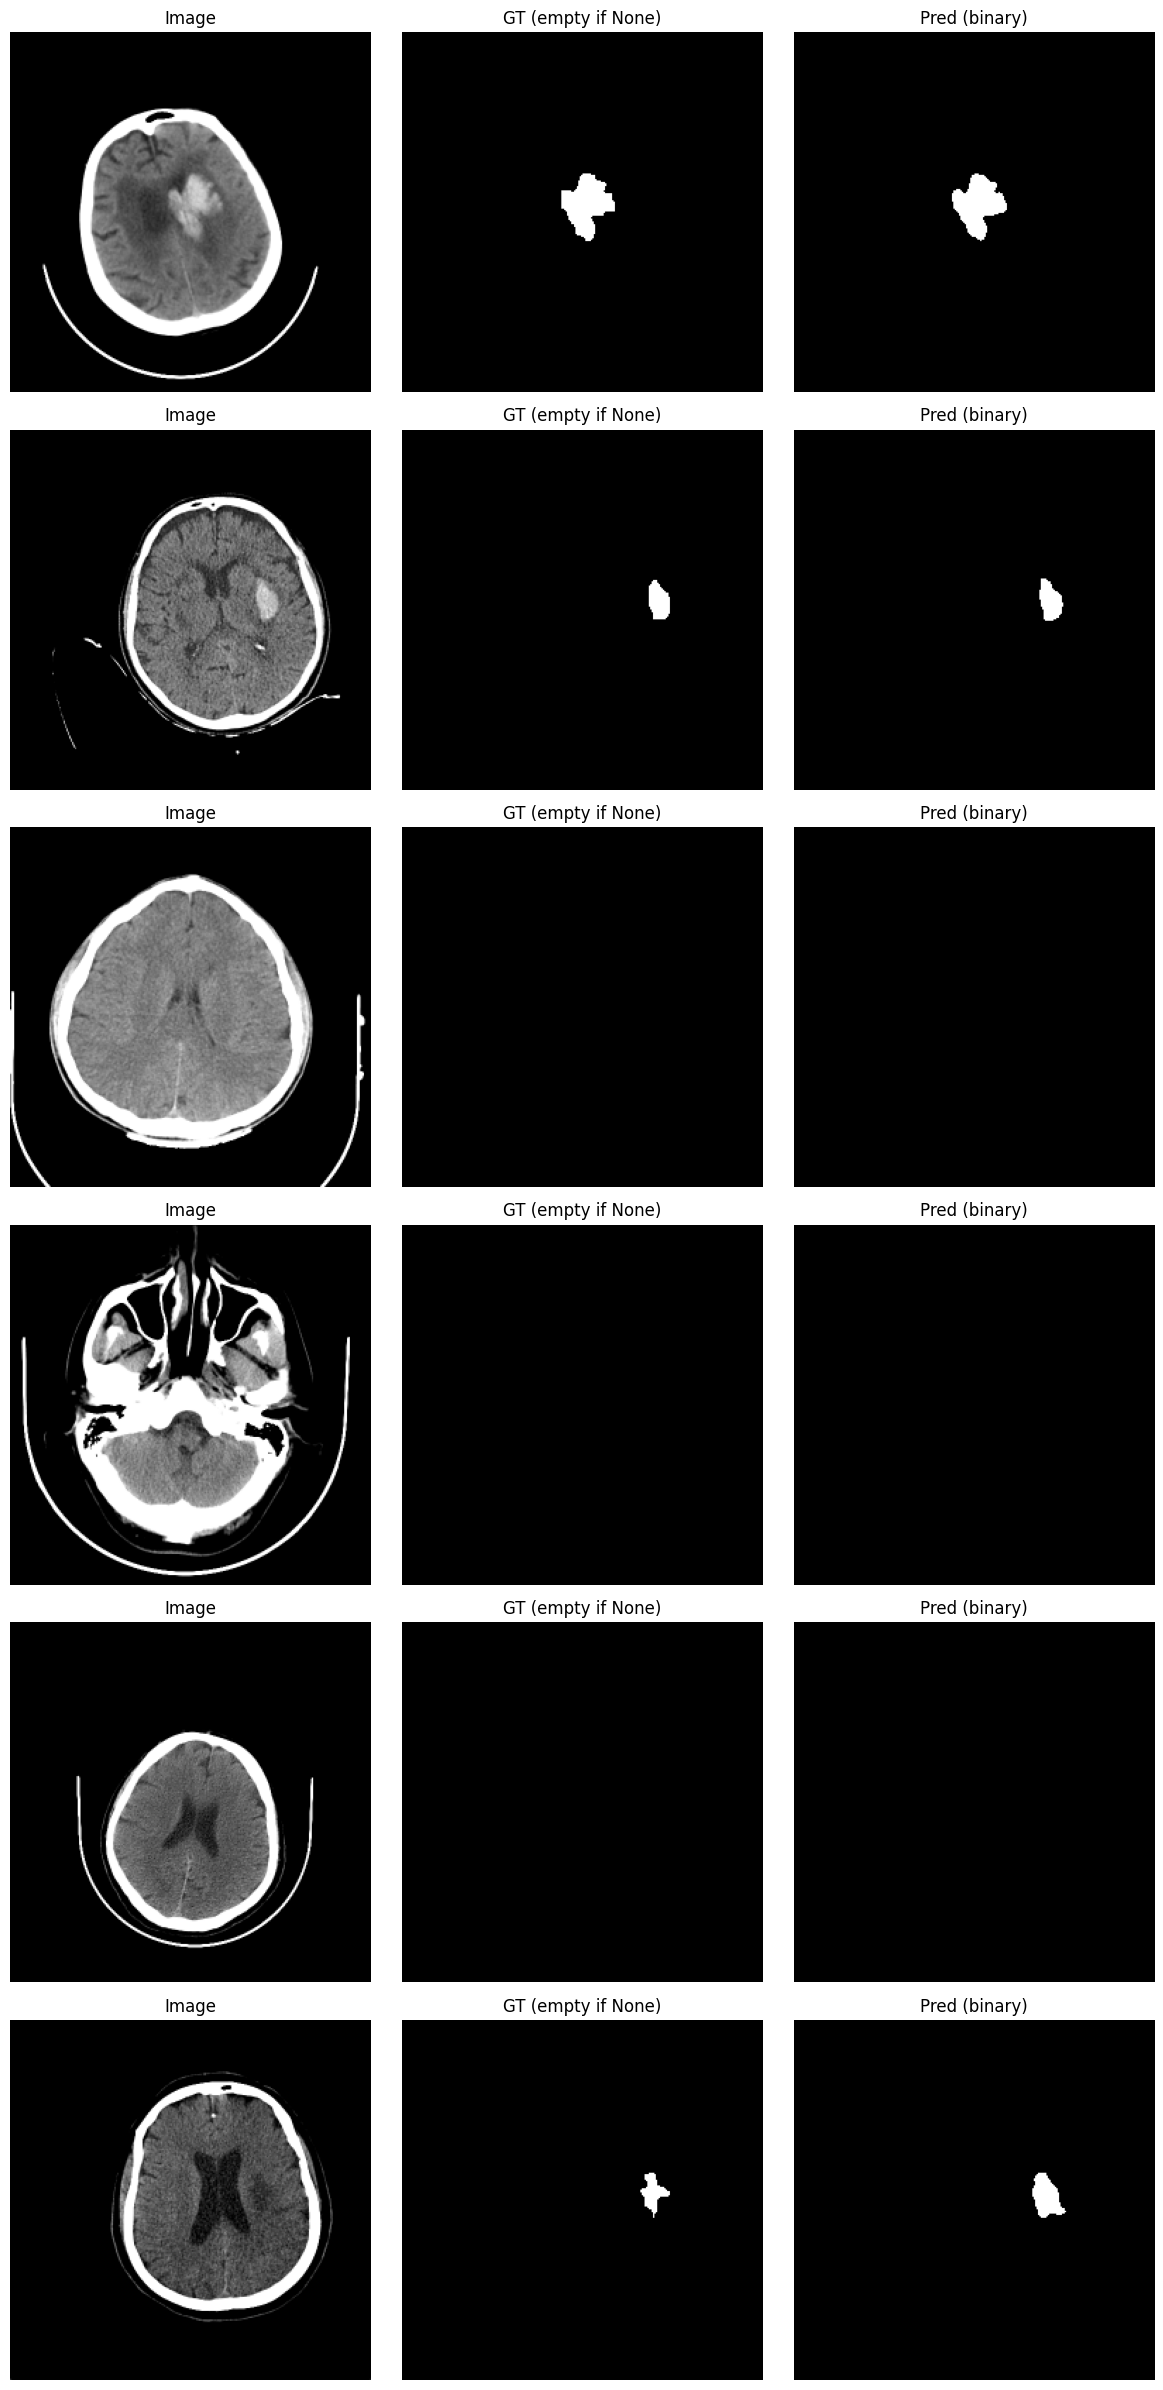

In [3]:
# ==== External_Test evaluation (uses the same preprocessing as training) ====

import os, cv2, numpy as np, torch, albumentations as A
import matplotlib.pyplot as plt
from glob import glob
from albumentations.pytorch import ToTensorV2

# --------- Config (edit root if needed) ----------
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
IMG_H, IMG_W = 256, 256
MODEL_WEIGHTS = "/kaggle/working/best_stroke_model_with_normals.pth"
DATASET_ROOT = "/kaggle/input/brain-stroke-ct-dataset/Brain_Stroke_CT_Dataset/External_Test"
PNG_DIR     = os.path.join(DATASET_ROOT, "PNG")
OVERLAY_DIR = os.path.join(DATASET_ROOT, "OVERLAY")

# --------- Same helpers as training ----------
def extract_red_mask_from_path(mask_path, width, height):
    if mask_path is None or not os.path.exists(mask_path): return None
    overlay = cv2.imread(mask_path)  # BGR
    if overlay is None: return None
    hsv = cv2.cvtColor(overlay, cv2.COLOR_BGR2HSV)
    lower1, upper1 = np.array([0, 50, 50]),  np.array([10, 255, 255])
    lower2, upper2 = np.array([170, 50, 50]), np.array([180, 255, 255])
    mask = cv2.inRange(hsv, lower1, upper1) | cv2.inRange(hsv, lower2, upper2)
    mask = (mask > 0).astype(np.float32)
    mask = cv2.resize(mask, (width, height), interpolation=cv2.INTER_NEAREST)
    return (mask > 0.5).astype(np.float32)

def get_transforms():
    return A.Compose([
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ])

# Build the exact same model definition you trained
import segmentation_models_pytorch as smp
def build_model():
    return smp.Unet(
        encoder_name='efficientnet-b4',
        encoder_weights='imagenet',
        in_channels=3,
        classes=1,
        activation=None,  # logits
    )

# --------- Load model ----------
model = build_model().to(DEVICE)
state = torch.load(MODEL_WEIGHTS, map_location=DEVICE)
model.load_state_dict(state)
model.eval()
print("Model loaded.")

# --------- Collect test pairs (allow missing overlays) ----------
png_files = sorted(glob(os.path.join(PNG_DIR, "*.png")))
image_paths, mask_paths = [], []
for p in png_files:
    fname = os.path.basename(p)
    ov = os.path.join(OVERLAY_DIR, fname)
    image_paths.append(p)
    mask_paths.append(ov if os.path.exists(ov) else None)

print(f"External_Test images: {len(image_paths)}  (with GT: {sum(1 for m in mask_paths if m is not None)})")

# --------- Evaluate ----------
tform = get_transforms()
dice_scores, iou_scores = [], []

# Extra stats for images WITHOUT GT (treat as negative)
neg_count, neg_fp_ratio = 0, []

with torch.no_grad():
    for img_path, mpath in zip(image_paths, mask_paths):
        # image
        bgr = cv2.imread(img_path)
        if bgr is None: continue
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
        rgb = cv2.resize(rgb, (IMG_W, IMG_H), interpolation=cv2.INTER_LINEAR)
        x = tform(image=rgb, mask=np.zeros((IMG_H, IMG_W), np.float32))['image'].unsqueeze(0).to(DEVICE)

        # predict
        logits = model(x)[0, 0].cpu().numpy()
        prob = 1 / (1 + np.exp(-logits))
        pred = (prob > 0.5).astype(np.float32)

        # metrics if GT exists
        gt = extract_red_mask_from_path(mpath, IMG_W, IMG_H) if mpath is not None else None
        if gt is not None:
            inter = np.sum(gt * pred)
            union = np.sum(gt) + np.sum(pred) - inter
            if union > 0:
                iou = inter / union
                dice = (2 * inter) / (np.sum(gt) + np.sum(pred) + 1e-6)
                iou_scores.append(iou); dice_scores.append(dice)
        else:
            # negative-only diagnostic: FP pixel ratio
            neg_count += 1
            total = IMG_H * IMG_W
            fp_ratio = np.sum(pred) / total  # fraction of predicted positive pixels
            neg_fp_ratio.append(fp_ratio)

print("\n=== External_Test results ===")
if len(dice_scores) > 0:
    print(f"Lesion-slices: N={len(dice_scores)}")
    print(f"Mean Dice: {np.mean(dice_scores):.4f} ± {np.std(dice_scores):.4f}")
    print(f"Mean IoU : {np.mean(iou_scores):.4f} ± {np.std(iou_scores):.4f}")
else:
    print("No ground-truth overlays found for metric computation.")

if neg_count > 0:
    print(f"Normal/No-GT images: N={neg_count}")
    print(f"Mean predicted positive area on normals: {np.mean(neg_fp_ratio)*100:.3f}%")

# ---- Optional: visualize a few ----
N_SHOW = min(6, len(image_paths))
fig, axs = plt.subplots(N_SHOW, 3, figsize=(12, 4*N_SHOW))
for i in range(N_SHOW):
    bgr = cv2.imread(image_paths[i])
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    rgb_r = cv2.resize(rgb, (IMG_W, IMG_H))
    x = tform(image=rgb_r, mask=np.zeros((IMG_H, IMG_W), np.float32))['image'].unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        logits = model(x)[0,0].cpu().numpy()
        prob = 1 / (1 + np.exp(-logits))
        pred_bin = (prob > 0.5).astype(np.uint8)*255

    axs[i,0].imshow(rgb_r); axs[i,0].set_title("Image"); axs[i,0].axis('off')
    gt = extract_red_mask_from_path(mask_paths[i], IMG_W, IMG_H) if mask_paths[i] is not None else None
    axs[i,1].imshow(gt if gt is not None else np.zeros_like(pred_bin), cmap='gray')
    axs[i,1].set_title("GT (empty if None)"); axs[i,1].axis('off')
    axs[i,2].imshow(pred_bin, cmap='gray'); axs[i,2].set_title("Pred (binary)"); axs[i,2].axis('off')
plt.tight_layout(); plt.show()


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ayushtibrewal/brain-stroke-images")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-stroke-images


Model loaded.


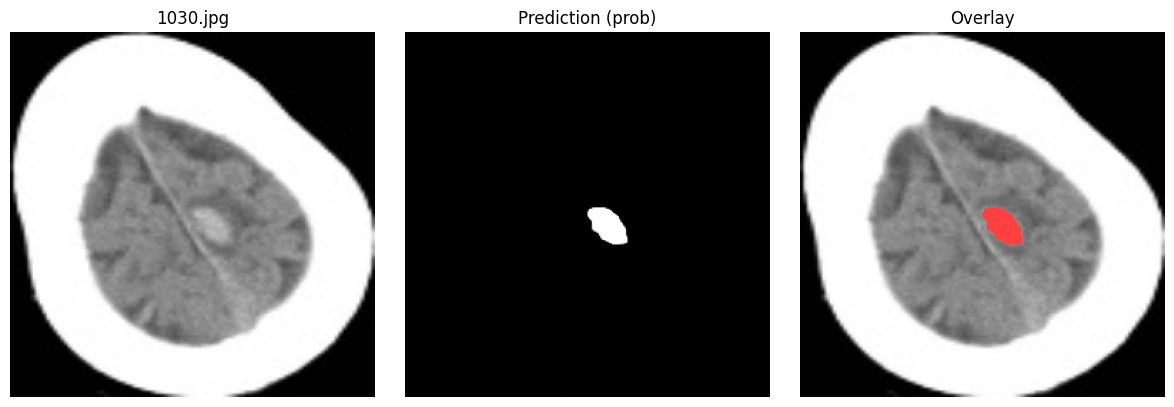

In [5]:
# ==== Inference on your own uploaded images (no GT) ====

import os, cv2, numpy as np, torch, albumentations as A
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
import segmentation_models_pytorch as smp

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
IMG_H, IMG_W = 256, 256
MODEL_WEIGHTS = "/kaggle/working/best_stroke_model_with_normals.pth"

def get_transforms():
    return A.Compose([
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ])

def build_model():
    return smp.Unet(
        encoder_name='efficientnet-b4',
        encoder_weights='imagenet',
        in_channels=3,
        classes=1,
        activation=None,
    )

# Load model
model = build_model().to(DEVICE)
model.load_state_dict(torch.load(MODEL_WEIGHTS, map_location=DEVICE))
model.eval()
print("Model loaded.")

# <<< EDIT THIS LIST: put your image paths here >>>
TEST_IMAGE_PATHS = [
    "/kaggle/input/brain-stroke-images/stroke_cropped/CROPPED/TRAIN_CROP/STROKE/1030.jpg"
]

tform = get_transforms()
rows = len(TEST_IMAGE_PATHS)
if rows == 0:
    print("Add paths to TEST_IMAGE_PATHS to run inference.")
else:
    fig, axs = plt.subplots(rows, 3, figsize=(12, 4*rows))
    if rows == 1: axs = np.array([axs])  # normalize indexing
    with torch.no_grad():
        for i, p in enumerate(TEST_IMAGE_PATHS):
            bgr = cv2.imread(p)
            if bgr is None:
                print(f"Could not read: {p}")
                continue
            rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
            rgb_r = cv2.resize(rgb, (IMG_W, IMG_H), interpolation=cv2.INTER_LINEAR)

            x = tform(image=rgb_r, mask=np.zeros((IMG_H, IMG_W), np.float32))['image'].unsqueeze(0).to(DEVICE)
            logits = model(x)[0,0].cpu().numpy()
            prob = 1 / (1 + np.exp(-logits))
            pred_bin = (prob > 0.5).astype(np.uint8)*255

            # Make a soft overlay
            overlay = rgb_r.copy()
            overlay[pred_bin > 0] = (255, 64, 64)

            axs[i,0].imshow(rgb_r); axs[i,0].set_title(os.path.basename(p)); axs[i,0].axis('off')
            axs[i,1].imshow(prob, cmap='gray'); axs[i,1].set_title("Prediction (prob)"); axs[i,1].axis('off')
            axs[i,2].imshow(overlay); axs[i,2].set_title("Overlay"); axs[i,2].axis('off')
    plt.tight_layout(); plt.show()
